This notebook is based on an implementation from https://github.com/stanfordnmbl/sit2stand-analysis. 

In [2]:
import git
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
homedir

'C:\\Users\\amanda\\Documents\\GitHub\\cs231n'

In [3]:
import sys
 
# setting path
sys.path.append(homedir)

In [4]:
%load_ext autoreload
%autoreload 2
from utils import *
import os
import numpy as np
import pandas as pd
import pickle
import traceback

In [5]:
processed_npy_path="{}/videos/np/".format(homedir)
subjectId = "1ovgasC1"
res = np.load("{}/{}.npy".format(processed_npy_path, subjectId))

In [6]:
res.shape

(261, 75)

In [7]:
print(res[0])

[181.952    132.913      0.916926 163.495    171.353      0.882614
 142.263    174.091      0.883358 180.664    207.18       0.833555
 205.822    188.618      0.765677 185.944    164.781      0.914011
 225.654    186.007      0.872335 191.265    187.287      0.797375
 171.377    254.824      0.743142 154.195    258.84       0.780059
 196.592    302.561      0.893396 176.665    352.835      0.871815
 185.924    249.5        0.78731  236.32     278.658      0.858709
 208.527    327.717      0.810905 173.965    127.661      0.894689
 181.97     123.746      0.784997 152.838    132.951      0.965228
   0.         0.         0.       234.955    343.596      0.863661
 231.007    338.312      0.756796 201.838    333.011      0.723481
 196.52     375.38       0.852015 185.96     374.082      0.77288
 172.68     352.884      0.794046]


L
[ 64 116 165]
[ 35  88 141 242]
[  8  64 116 221 260]
[ 35  88 141 242]


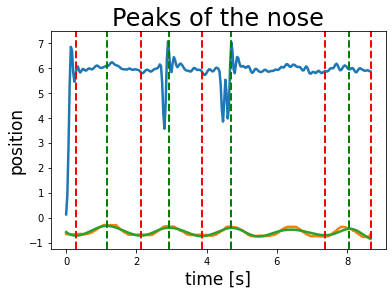

1.008425195397229


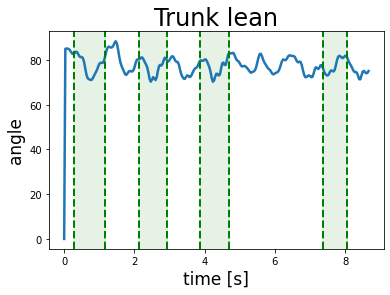

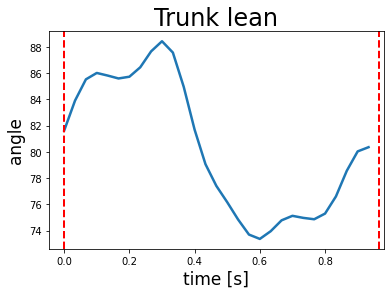

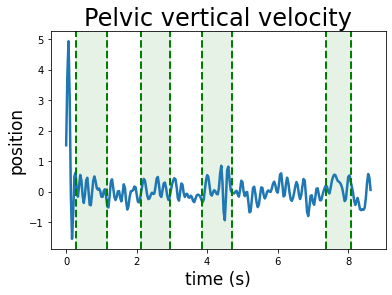

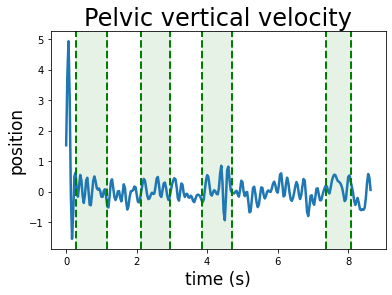

{'subjectid': '1ovgasC1',
 'orientation': 'L',
 'framerate': 30,
 'n': 4,
 'time': 8.4,
 'time_diff': -0.18888888888888897,
 'speed': 0.48,
 'time_sd': 0.8349983366583565,
 'speed_sd': 0.17217380589409773,
 'n_sit2stand': 4,
 'time_sit2stand': 3.2333333333333334,
 'time_diff_sit2stand': -0.7444444444444445,
 'speed_sit2stand': 1.24,
 'time_sd_sit2stand': 0.07216878364870324,
 'speed_sd_sit2stand': 0.1158137147124428,
 'n_stand2sit': 3,
 'time_stand2sit': 4.566666666666666,
 'time_diff_stand2sit': 0.6777777777777777,
 'speed_stand2sit': 0.66,
 'time_sd_stand2sit': 0.8093588378433028,
 'speed_sd_stand2sit': 0.3199470888728723,
 'left_knee_range_mean': 23.22152399543008,
 'left_knee_sd': 9.310369046537827,
 'left_knee_max': 63.2447840125341,
 'left_knee_min': 26.069340873099463,
 'left_knee_max_mean': 58.084300270184,
 'left_knee_min_mean': 29.6107140147584,
 'left_knee_max_sd': 3.6061173172731014,
 'left_knee_min_sd': 3.6892135738592207,
 'left_knee_ang_vel': 4.966870862692865,
 'left_kn

In [8]:
# Process a subject (quick test)
process_subject("1ovgasC1", processed_npy_path="{}/videos/np/".format(homedir) , framerate=30)

In [8]:
# Get a list of all subjects
subjects = os.listdir("{}/videos/keypoints/".format(homedir))

02MJoCiL
L
[ 84 156 216 283]
[ 53 118 183 251 319]
[ 24  84 156 216 283 348]
[ 53 118 183 251 319]


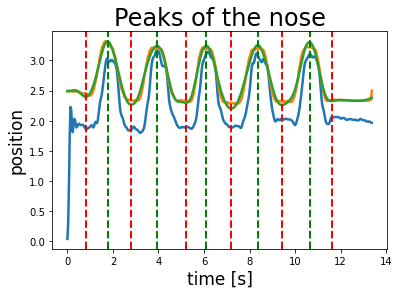

3.4018280086751065


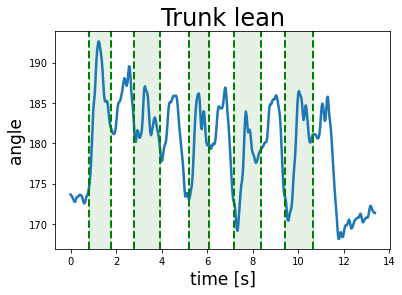

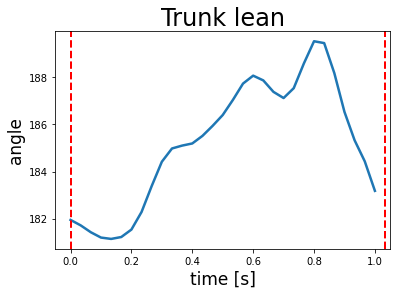

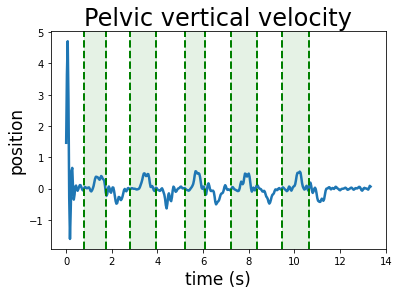

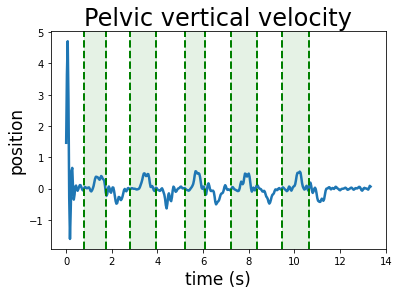

0B2dfO4b
R
[ 74 121 157 208 260]
[ 49  91 136 183 235]
[ 32  74 121 157 208 260]
[ 49  91 136 183 235]


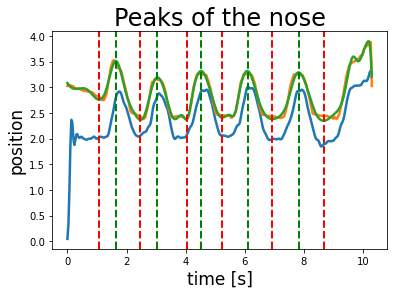

3.5866781672538943


KeyboardInterrupt: 

In [9]:
skipped = []
all_res = []

# Convert OpenPose frames to a numpy array
for subjectid in subjects: #).difference(set(toremove + tocheck)):
    print(subjectid)
    try:
        results = process_subject(subjectid, processed_npy_path="{}/videos/np/".format(homedir) , framerate=30)
    except Exception as e:
        traceback.print_exc()
        skipped.append(subjectid)
        print("Skipped " + subjectid)
        continue
    all_res.append(results)    
print(skipped)

In [ ]:
# Write ids of all videos that were skipped
for s in skipped:
    print(s)

In [ ]:
# Print out and save results
res_df = pd.DataFrame(all_res)
res_df

In [ ]:
res_df.to_csv("{}/results/results-20230427.csv".format(homedir))